In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

# Data loading and pre-processing

In [421]:
data = pd.read_csv("vehicle.csv")

In [422]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [423]:
data.shape

(846, 19)

In [424]:
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# Attribute Information

In [425]:
#COMPACTNESS (average perimeter)**2/area
#CIRCULARITY (average radius)**2/area
#DISTANCE CIRCULARITY area/(av.distance from border)**2
#RADIUS RATIO (max.rad-min.rad)/av.radius
#PR.AXIS ASPECT RATIO (minor axis)/(major axis)
#MAX.LENGTH ASPECT RATIO (length perp. max length)/(max length)
#SCATTER RATIO (inertia about minor axis)/(inertia about major axis)
#ELONGATEDNESS area/(shrink width)**2
#PR.AXIS RECTANGULARITY area/(pr.axis length*pr.axis width)
#MAX.LENGTH RECTANGULARITY area/(max.length*length perp. to this)
#scaled_variance (2nd order moment about minor axis)/area ALONG MAJOR AXIS
#scaled_variance.1 (2nd order moment about major axis)/area ALONG MINOR AXIS
#SCALED RADIUS OF GYRATION (mavar+mivar)/area
#skewness_about (3rd order moment about major axis)/sigma_min**3 MAJOR AXIS
#skewness_about.1 (3rd order moment about minor axis)/sigma_maj**3 MINOR AXIS
#HOLLOWS RATIO (area of hollows)/(area of bounding polygon)

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [427]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


# Looking into the data, it looks features are normally distributed

In [428]:
missingValue = (data.isnull().sum())
print(missingValue)

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


# There are missing values, here I will try to use KNNImputer to fill the missing data

In [429]:
data["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [430]:
# Splitting the data for KNNImputer

In [431]:
X = data.drop(labels='class', axis=1)

In [432]:
y = data['class']

In [433]:
#Checking for K for the KNNImputer

In [434]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

>1 0.956 (0.024)
>3 0.959 (0.020)
>5 0.957 (0.021)
>7 0.957 (0.019)
>9 0.957 (0.021)
>15 0.955 (0.022)
>18 0.957 (0.019)
>21 0.960 (0.019)
>23 0.954 (0.022)
>25 0.956 (0.020)
>29 0.957 (0.019)
>31 0.956 (0.019)


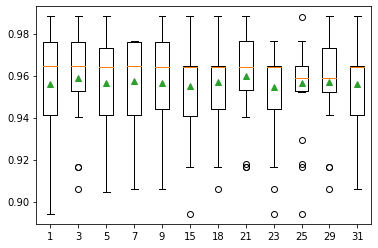

In [435]:
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21,23,25,29,31]]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store results
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In [436]:
# Let's use K=21

In [437]:
imputer = KNNImputer(n_neighbors=21)

In [438]:
dataImputed = imputer.fit_transform(X)

In [439]:
pdata = pd.DataFrame(data=dataImputed, columns= ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'])

In [440]:
pdata['class']= y

In [441]:
missingValue = (pdata.isnull().sum())
print(missingValue)

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64


In [442]:
dups = pdata.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [443]:
#Now no missing values

In [444]:
pdata.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


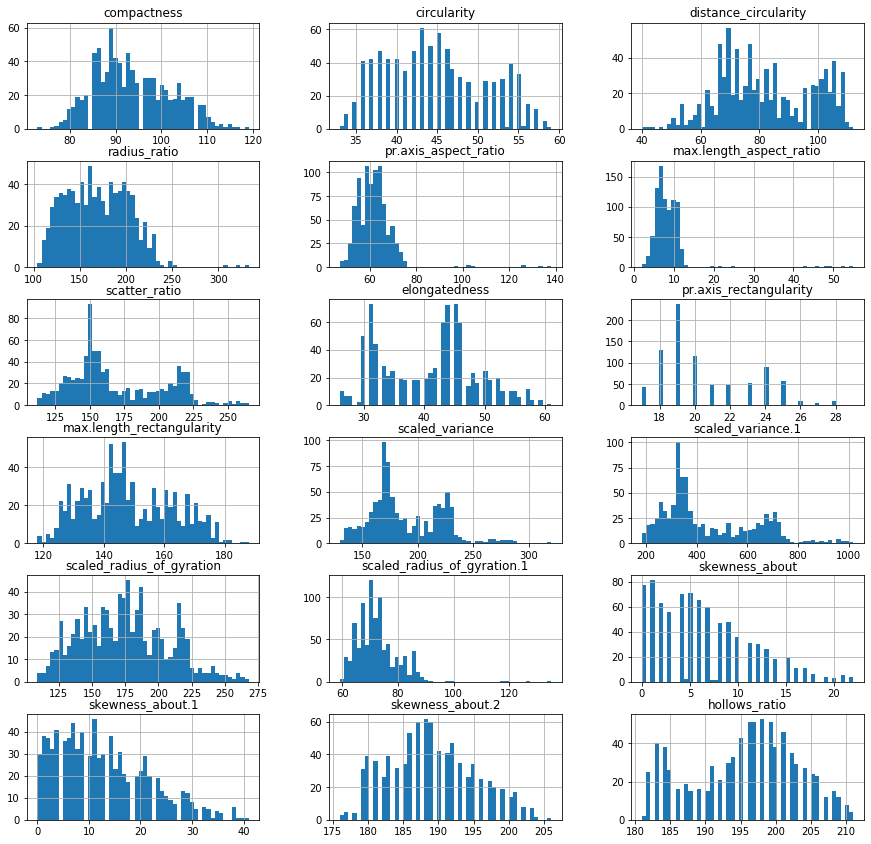

In [445]:
pdata.hist(stacked=True, bins=50, figsize=(15,35), layout=(14,3)); 

In [446]:
# Data looks good and normally distributed

In [447]:
# Let's find out the variable importance using RandomForestClassifier

In [448]:
X = pdata.drop(labels='class', axis=1)

In [449]:
y= pdata['class']

In [450]:
from xgboost import XGBClassifier

Feature: 0, Score: 0.03120
Feature: 1, Score: 0.05325
Feature: 2, Score: 0.02252
Feature: 3, Score: 0.01410
Feature: 4, Score: 0.03398
Feature: 5, Score: 0.16901
Feature: 6, Score: 0.05310
Feature: 7, Score: 0.15730
Feature: 8, Score: 0.02928
Feature: 9, Score: 0.04847
Feature: 10, Score: 0.05543
Feature: 11, Score: 0.13871
Feature: 12, Score: 0.01306
Feature: 13, Score: 0.03919
Feature: 14, Score: 0.02989
Feature: 15, Score: 0.03350
Feature: 16, Score: 0.02828
Feature: 17, Score: 0.04972


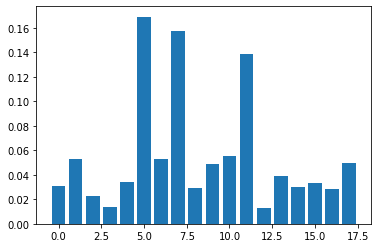

In [451]:
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [452]:
# max.length_aspect_ratio,elongatedness,max.length_rectangularity,scaled_variance,scaled_variance.1 are the 
# highest relevant features

In [453]:
# Let's use Logistic Regression for feature importance

In [454]:
from sklearn.linear_model import LogisticRegression

Feature: 0, Score: -0.94822
Feature: 1, Score: 0.05513
Feature: 2, Score: -1.36171
Feature: 3, Score: -2.88845
Feature: 4, Score: 2.28264
Feature: 5, Score: -0.45413
Feature: 6, Score: 0.54473
Feature: 7, Score: -1.97273
Feature: 8, Score: 0.11231
Feature: 9, Score: -0.77806
Feature: 10, Score: 1.69809
Feature: 11, Score: 0.83257
Feature: 12, Score: 0.84256
Feature: 13, Score: 0.66111
Feature: 14, Score: -0.44938
Feature: 15, Score: 0.28980
Feature: 16, Score: 3.00675
Feature: 17, Score: -2.11817


C:\Users\sonar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


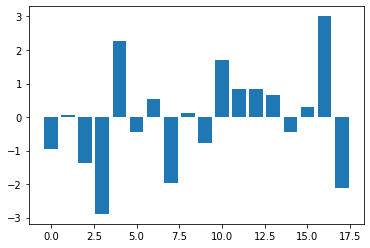

In [455]:
model = LogisticRegression()
# fit the model
model.fit(StandardScaler().fit_transform(X), y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

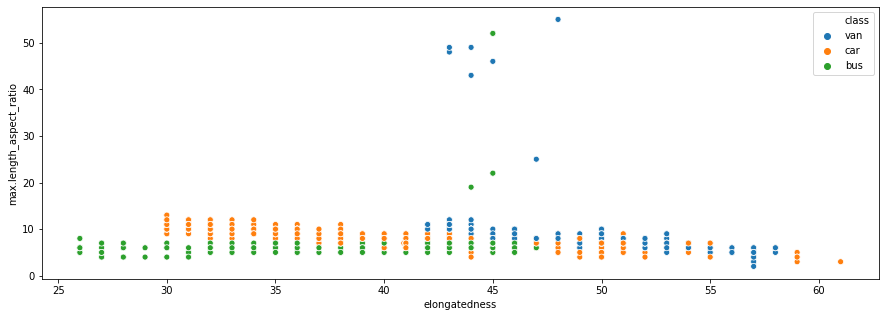

In [456]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=pdata,x="elongatedness",y="max.length_aspect_ratio",hue="class")

In [457]:
# Scatter Plot between 2 most relevant features
# For BUS the elongatedness and max.length_aspect_ratio is on lesser end.
# For CAR it's bit higher than BUS
# For van the elongatedness is on higher end.

# EDA on the data

In [458]:
# 1. Correlation heatmap

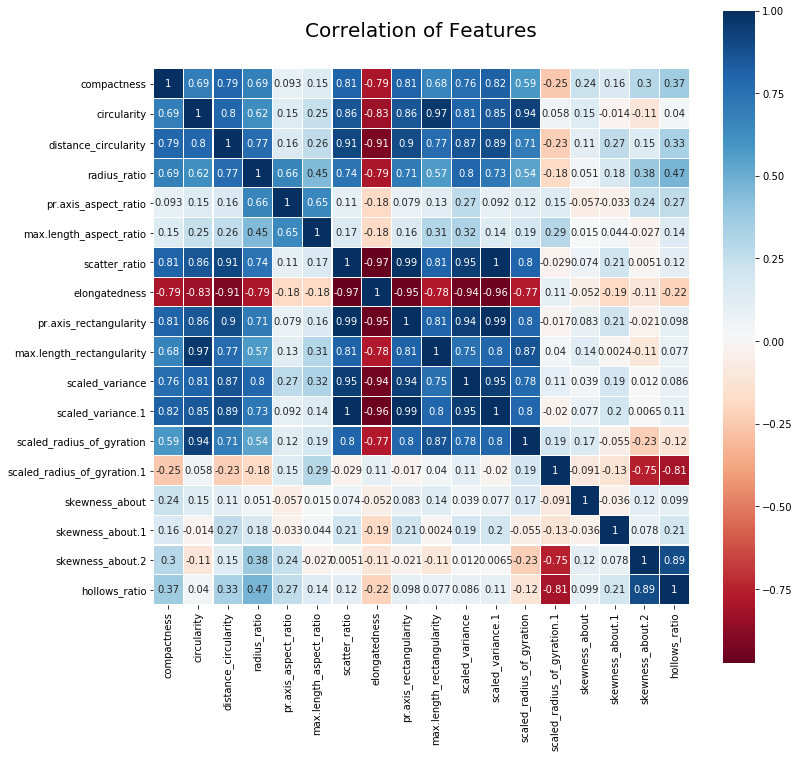

In [459]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(pdata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [460]:
# scaled_variance.1 & scatter_ratio are highly related.
# scatter_ratio & pr.axis_rectangularity are highly related

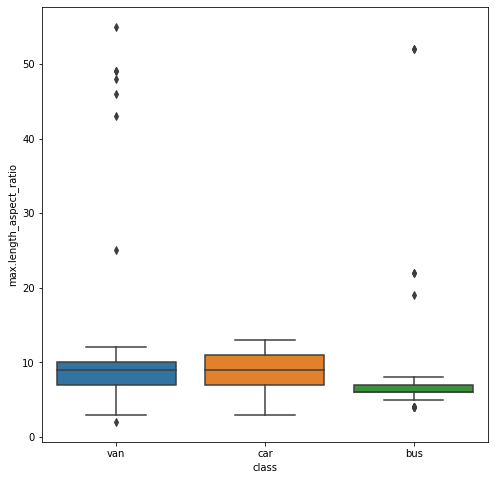

In [461]:
plt.figure(figsize=(8 , 8))
ax = sns.boxplot(x='class', y='max.length_aspect_ratio', data=pdata)

In [462]:
# max.length_aspect_ratio for bus seems to be on the lower side, 
# median value for length_aspect_ratio for van and car seems to be almost equal
# This feature max.length_aspect_ratio seems to clearly identify the bus

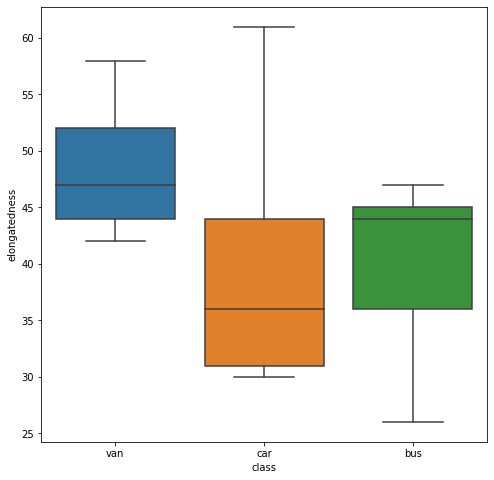

In [463]:
plt.figure(figsize=(8 , 8))
ax = sns.boxplot(x='class', y='elongatedness', data=pdata)

In [464]:
# elongatedness for van seems to be on the higher end
# This feature elongatedness seems to clearly identify the van

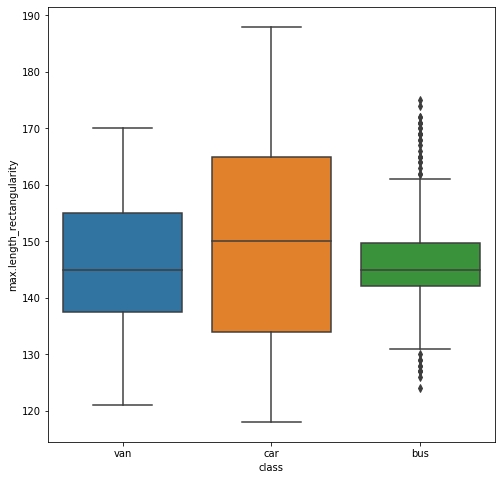

In [465]:
plt.figure(figsize=(8 , 8))
ax = sns.boxplot(x='class', y='max.length_rectangularity', data=pdata)

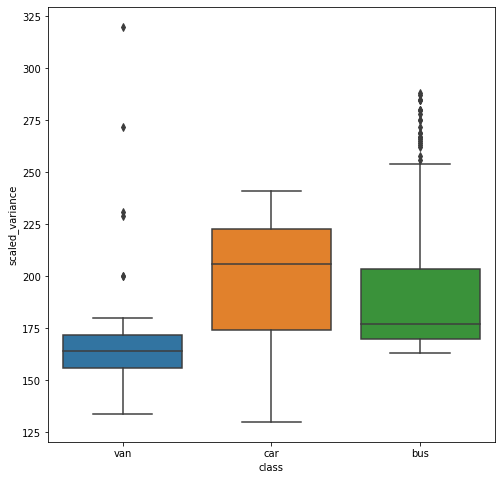

In [466]:
plt.figure(figsize=(8 , 8))
ax = sns.boxplot(x='class', y='scaled_variance', data=pdata)

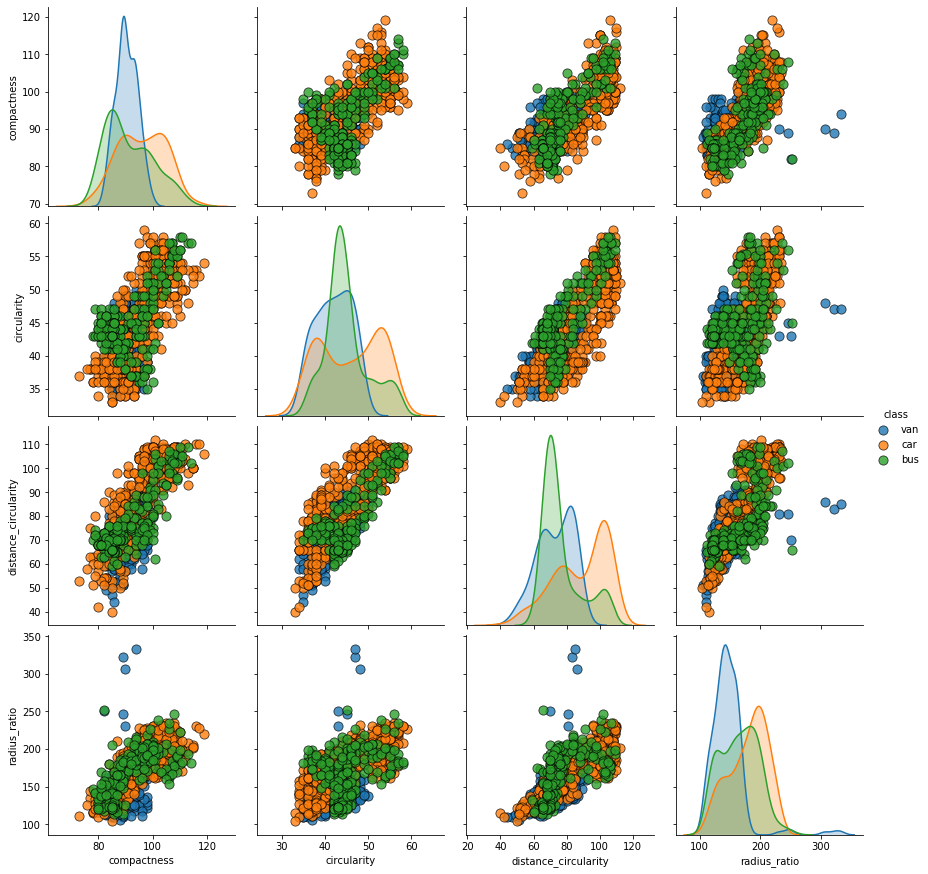

In [467]:
sns.pairplot(pdata, 
             vars = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio'], 
             hue = 'class', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

In [468]:
# Compactness of van is on higher end, so this one will clearly identiry vans

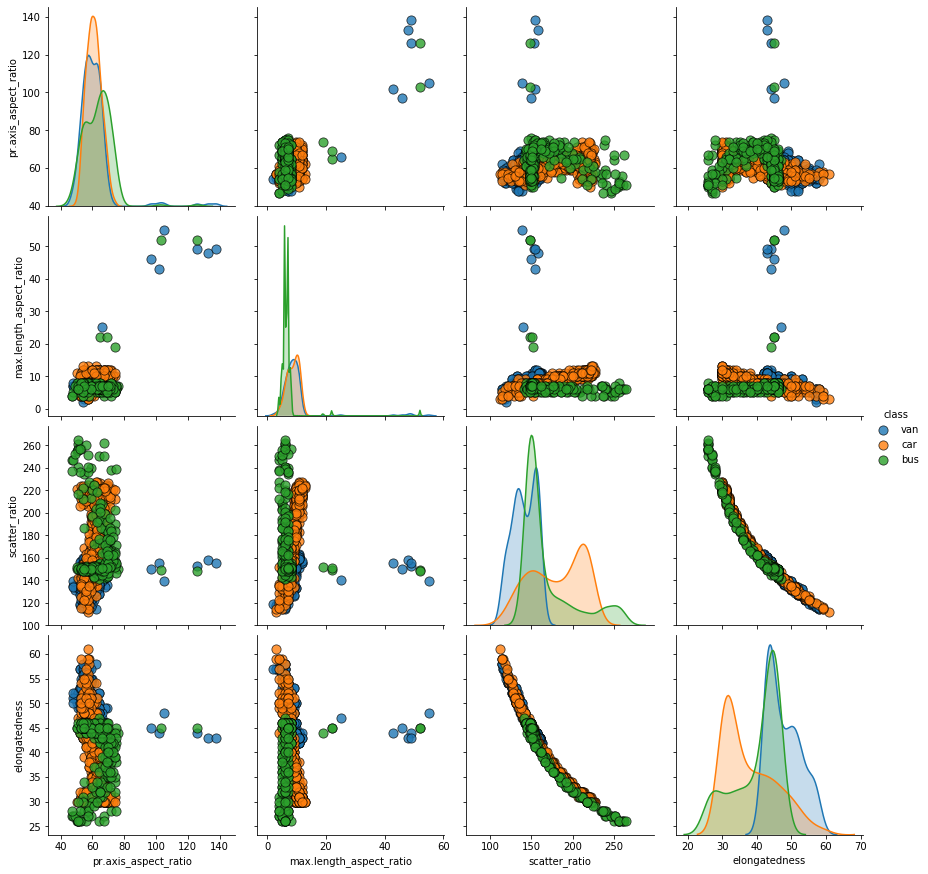

In [469]:
sns.pairplot(pdata, 
             vars = ['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio','elongatedness'], 
             hue = 'class', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

In [470]:
# max.length_aspect_ratio (Aspect ratio is defined as the ratio between the length (usually the longer dimension) and the width (usually the shorter dimension) of a rectangular shape)
# max.length_aspect_ratio is higher for bus so this would actually help us to identify the buses.

# Data seems to have multiple gaussians, for each type seems to have 2 classes of vehicles

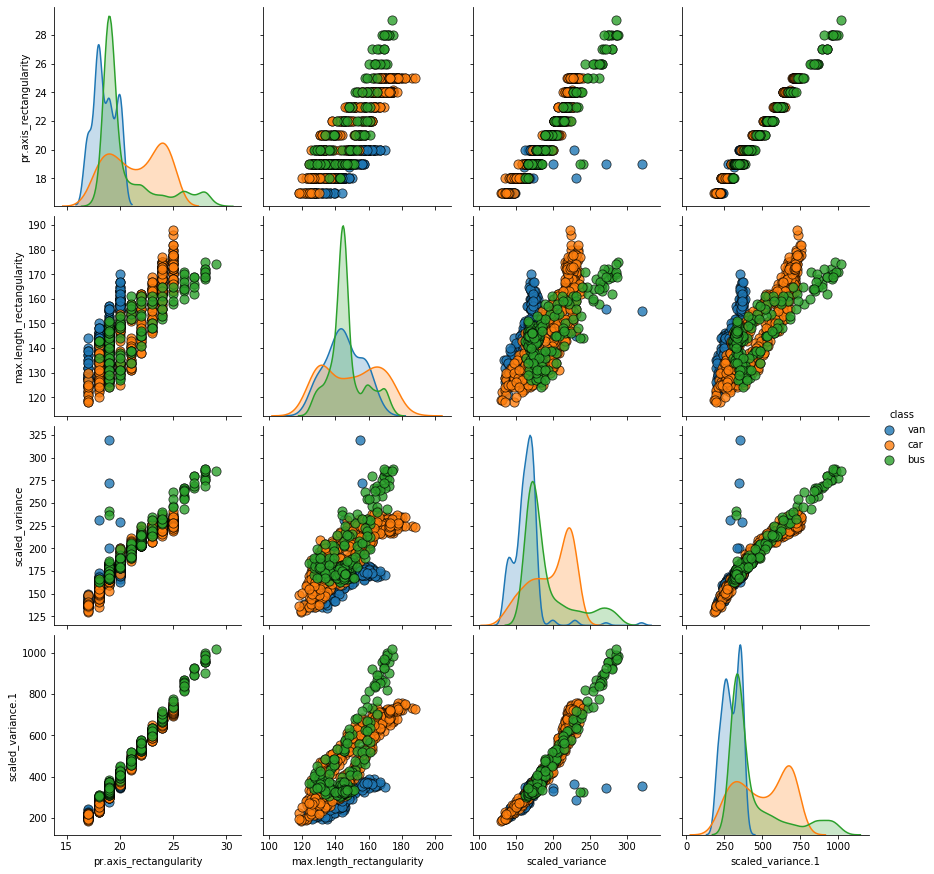

In [471]:
sns.pairplot(pdata, 
             vars = ['pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1'], 
             hue = 'class', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

In [472]:
# Scaled variance and Scaled Variance.1 are highly related to each other, so we can use scaled variance for predicting the target

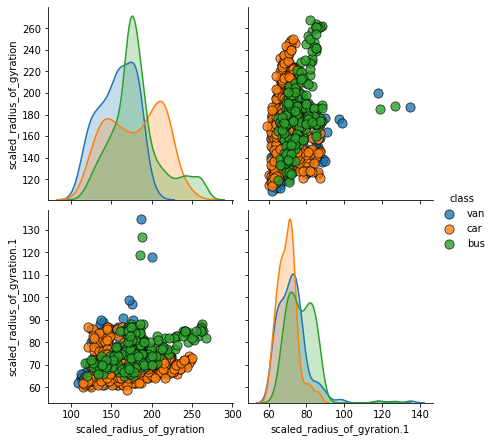

In [473]:
sns.pairplot(pdata, 
             vars = ['scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1'], 
             hue = 'class', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

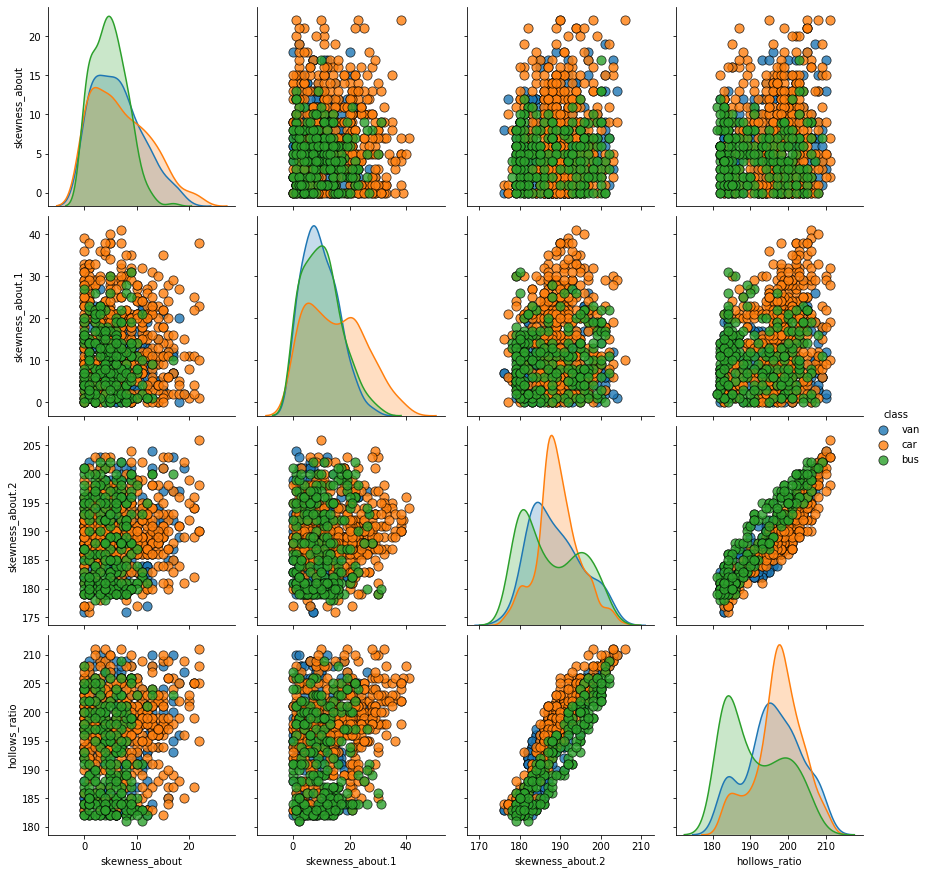

In [474]:
sns.pairplot(pdata, 
             vars = [ 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'], 
             hue = 'class', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.8, 's': 85, 'edgecolor': 'k'},
             height = 3);

In [475]:
X = pdata.drop(labels=['class','radius_ratio','scaled_variance.1'], axis=1)

In [476]:
y= pdata['class']

# Splitting the data in Train and Test set

In [477]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 23)

In [478]:
# scaling the data using the standard scaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [479]:
X_train.head()

,compactness,circularity,distance_circularity,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
203,103.0,55.0,100.0,62.0,11.0,212.0,31.0,24.0,175.0,217.0,219.0,73.0,10.0,14.0,187.0,194.0
196,107.0,56.0,104.0,71.0,11.0,219.0,31.0,25.0,172.0,226.0,217.0,71.0,19.0,11.0,189.0,196.0
509,101.0,55.0,105.0,59.0,10.0,215.0,31.0,24.0,177.0,221.0,223.0,74.0,12.0,26.0,186.0,195.0
314,90.0,42.0,63.0,55.0,7.0,152.0,45.0,19.0,142.0,173.0,173.0,81.0,0.0,15.0,180.0,184.0
135,89.0,47.0,83.0,133.0,48.0,158.0,43.0,20.0,163.0,229.0,176.0,97.0,0.0,14.0,184.0,194.0


# Using SVM classifier 

In [480]:
from sklearn.svm import SVC

In [481]:
modelSVM = SVC(kernel='rbf', C=1)
modelSVM.fit(X_train_sd, y_train)
svm_score_withoutPCA = modelSVM.score(X_test_sd, y_test)
print ('SVM Score on test data: Before PCA', svm_score_withoutPCA)

SVM Score on test data: Before PCA 0.9588235294117647


In [482]:
y_predict_svm = modelSVM.predict(X_test_sd)

# Using K fold cross validation 

In [483]:
from sklearn.model_selection import cross_val_score

In [484]:
scores = cross_val_score(clf, X_train_sd, y_train, cv=5)

In [485]:
svm_KFoldScore_withoutPCA = scores.mean()

In [486]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.04)


# Using PCA to find Principal Components that capture 95% of variance in data

In [487]:
X_scaled=StandardScaler().fit_transform(X)

In [488]:
from sklearn.decomposition import PCA

In [489]:
covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.6933696   0.79301134  0.09280909  0.14842463  0.81397867
  -0.7895739   0.81425782  0.67694334  0.7654835   0.58577179 -0.25341849
   0.23678138  0.15844938  0.29862451  0.36598446]
 [ 0.6933696   1.00118343  0.79954473  0.14979172  0.24833882  0.86071805
  -0.82945973  0.85810044  0.9670742   0.80869259  0.9365438   0.05801995
   0.14719997 -0.01407402 -0.11134867  0.03955329]
 [ 0.79301134  0.79954473  1.00118343  0.16039536  0.2640595   0.90934117
  -0.91421398  0.89733705  0.77581356  0.86695542  0.70673849 -0.2303173
   0.11429985  0.26590658  0.1479808   0.33390747]
 [ 0.09280909  0.14979172  0.16039536  1.00118343  0.64917998  0.10560195
  -0.18468844  0.07933597  0.12860758  0.27449132  0.12353898  0.15195305
  -0.05749592 -0.03329101  0.23948159  0.26787977]
 [ 0.14842463  0.24833882  0.2640595   0.64917998  1.00118343  0.16694847
  -0.18025246  0.16203676  0.30630475  0.31984982  0.18988449  0.29477166
   0.01486374  0.04369541 -0.02682904  0.14408905]
 [ 0.8

In [490]:
pca = PCA(n_components=16)
pca.fit(X_scaled)

PCA(n_components=16)

In [491]:
print(pca.explained_variance_)

[7.85678111e+00 2.92272660e+00 1.72266196e+00 1.16665768e+00
 9.12141348e-01 4.77992227e-01 3.40889477e-01 2.17094476e-01
 1.46924577e-01 8.91099527e-02 5.77721922e-02 4.27153874e-02
 3.06034714e-02 1.74632260e-02 1.41685177e-02 3.23270605e-03]


In [492]:
print(pca.components_)

[[ 2.99900679e-01  3.29524969e-01  3.33010279e-01  7.46677915e-02
   1.03366109e-01  3.46983962e-01 -3.41668387e-01  3.44273718e-01
   3.17169499e-01  3.36531282e-01  3.04973712e-01 -1.73885515e-02
   5.00477783e-02  5.98163068e-02  2.02238682e-02  7.07442779e-02]
 [-1.56517304e-01  1.09345223e-01 -9.81750407e-02 -6.21445028e-02
   5.47013386e-02  2.16795739e-02  3.47562746e-02  3.33174552e-02
   9.49521327e-02  5.19329272e-02  1.92039852e-01  5.21952686e-01
  -7.25212007e-02 -1.36444742e-01 -5.46937751e-01 -5.47924395e-01]
 [-8.38300741e-02 -2.59888988e-02 -2.48859526e-02  6.77971915e-01
   6.44470434e-01 -8.97314159e-02  4.24638041e-02 -1.03771401e-01
  -3.83453177e-03  6.51485204e-02 -4.64987018e-02  2.21910679e-01
  -1.01195169e-01 -5.13797147e-02  9.32677289e-02  1.37191850e-01]
 [ 6.51043169e-02  1.65824721e-01 -9.22083908e-02  3.05607674e-02
   7.08471317e-03 -1.06969408e-01  9.56695979e-02 -1.04426131e-01
   1.61912234e-01 -1.27783708e-01  1.84704504e-01 -6.06569669e-02
   6.02

In [493]:
print(pca.explained_variance_ratio_)

[4.90468384e-01 1.82454490e-01 1.07539107e-01 7.28299158e-02
 5.69414480e-02 2.98392015e-02 2.12804084e-02 1.35523665e-02
 9.17193169e-03 5.56278886e-03 3.60649397e-03 2.66655602e-03
 1.91045606e-03 1.09016149e-03 8.84485629e-04 2.01805305e-04]


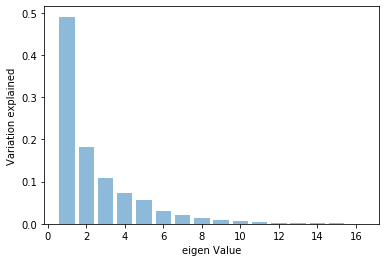

In [494]:
plt.bar(list(range(1,pca.explained_variance_ratio_.size+1)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

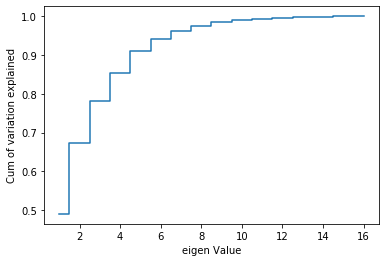

In [495]:
plt.step(list(range(1,pca.explained_variance_ratio_.size+1)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [496]:
np.cumsum(pca.explained_variance_ratio_)

array([0.49046838, 0.67292287, 0.78046198, 0.8532919 , 0.91023334,
       0.94007255, 0.96135295, 0.97490532, 0.98407725, 0.98964004,
       0.99324654, 0.99591309, 0.99782355, 0.99891371, 0.99979819,
       1.        ])

In [497]:
# 7 Components are explaining about 95% of variance in data

In [498]:
#Split the data in train and test 

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 23)

In [500]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [501]:
pca_comp = PCA(n_components=7)
pca_comp.fit(X_train_sd)
Xpca_train = pca_comp.transform(X_train_sd)
Xpca_test = pca_comp.transform(X_test_sd)

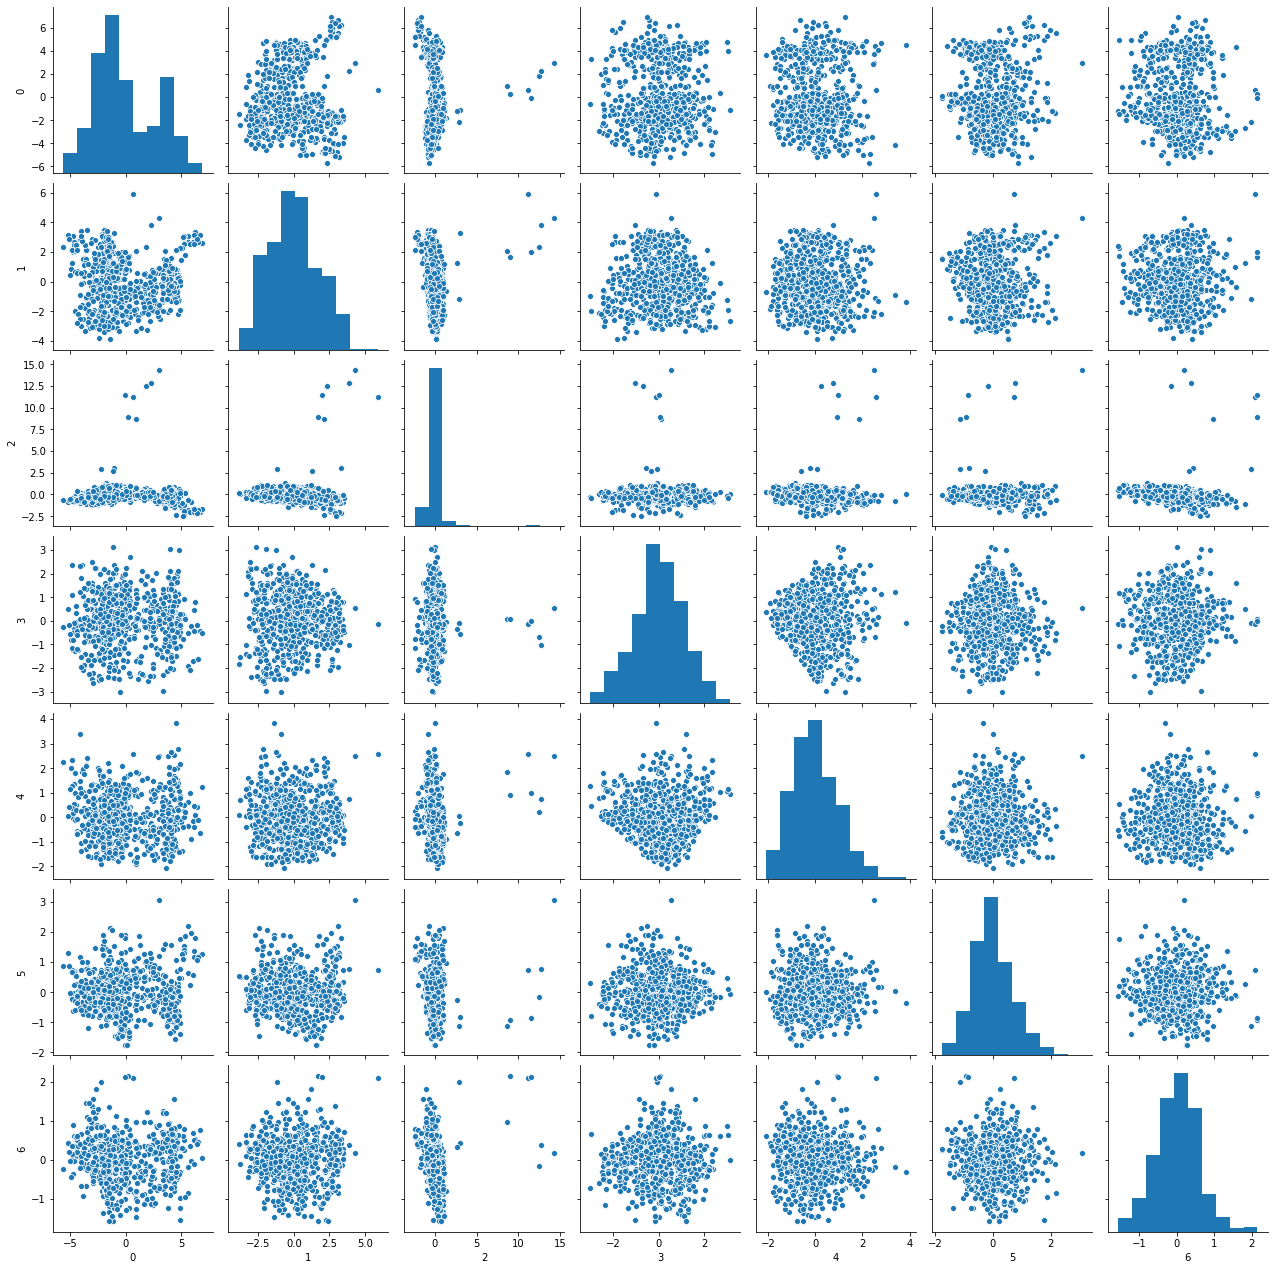

In [502]:
sns.pairplot(pd.DataFrame(Xpca_train))

In [503]:
clf = SVC(kernel='rbf', C=1)
clf.fit(Xpca_train, y_train)

SVC(C=1)

In [504]:
svm_score_withPCA = clf.score(Xpca_test, y_test)

In [505]:
print ('SVM Score on test data: After PCA', svm_score_withPCA)

SVM Score on test data: After PCA 0.9176470588235294


In [506]:
y_predict_svm_pca = clf.predict(Xpca_test)

In [507]:
scores = cross_val_score(clf, Xpca_train, y_train, cv=5)

In [508]:
svm_KFoldScore_withPCA = scores.mean()

In [509]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.06)


# Result Analysis

In [510]:
data = np.array([svm_score_withoutPCA,svm_KFoldScore_withoutPCA, svm_score_withPCA,svm_KFoldScore_withPCA]).T
df = pd.DataFrame(data, index=["SVM Score","SVM KFold Score","SVM Score with PCA","SVM KFold Score with PCA"], columns=["Accuracy"])
df

,Accuracy
SVM Score,0.958824
SVM KFold Score,0.957059
SVM Score with PCA,0.917647
SVM KFold Score with PCA,0.920044


In [511]:
def draw_confusion_matrix(y_test,y_predict):
    cm=metrics.confusion_matrix(y_test,y_predict, labels=['van','car','bus'])

    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual van","Actual car","Actual bus"]],
                  columns = [i for i in ["Predict van","Predict car","Predict bus"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True,fmt="g",cmap='Blues')

In [512]:
from sklearn.metrics import classification_report
from sklearn import metrics
import collections

In [513]:
collections.Counter(y_test)

Counter({'van': 38, 'bus': 43, 'car': 89})

In [514]:
collections.Counter(y_predict_svm)

Counter({'van': 38, 'bus': 42, 'car': 90})

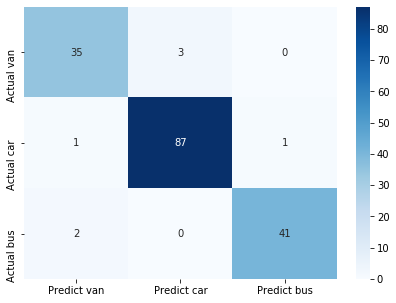

In [515]:
# confusion matrix for SVM
draw_confusion_matrix(y_test,y_predict_svm)

In [516]:
print(classification_report(y_test, y_predict_svm, digits=2))

              precision    recall  f1-score   support

         bus       0.98      0.95      0.96        43
         car       0.97      0.98      0.97        89
         van       0.92      0.92      0.92        38

    accuracy                           0.96       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.96      0.96      0.96       170



In [517]:
collections.Counter(y_predict_svm_pca)

Counter({'van': 40, 'bus': 43, 'car': 87})

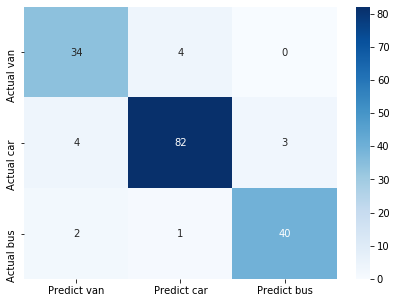

In [518]:
# confusion matrix for SVM with PCA
draw_confusion_matrix(y_test,y_predict_svm_pca)

In [519]:
print(classification_report(y_test, y_predict_svm_pca, digits=2))

              precision    recall  f1-score   support

         bus       0.93      0.93      0.93        43
         car       0.94      0.92      0.93        89
         van       0.85      0.89      0.87        38

    accuracy                           0.92       170
   macro avg       0.91      0.92      0.91       170
weighted avg       0.92      0.92      0.92       170



# Let's visualize the data with popular T-SNE algorithm to get a feel of data

In [520]:
from sklearn.manifold import TSNE

In [521]:
tsne = TSNE(n_components=2, perplexity=50,n_iter=1000)

In [522]:
tsne_data = tsne.fit_transform(X)

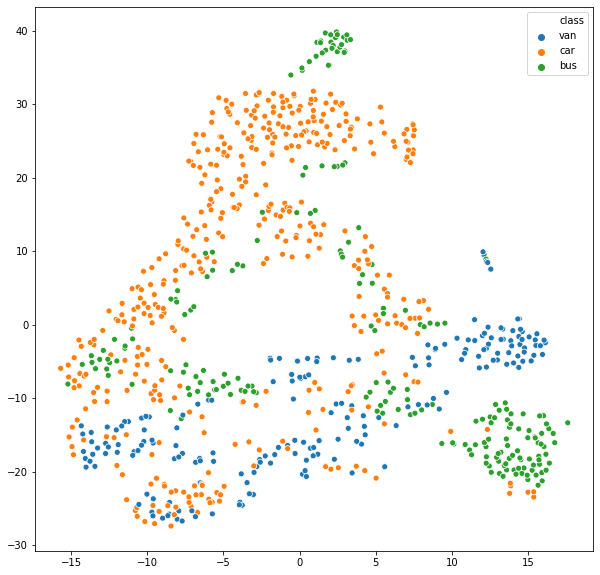

In [523]:
plt.figure(figsize=(10 , 10))
sns.scatterplot(tsne_data[:,0], tsne_data[:,1], hue=y, legend='full')

In [524]:
# Accuracy score using orginal data with SVM was 96%
# Accuracy score after PCA and using 7 principal components it's 92%
# By reducing the dimensions from 18 independent variables to 7 variables after performing PCA and taking 
# into consideration 95% of the variation in the data. The accuracy score is still better.
# Car has the highest F1 score on prediction
# Dimentionality reduction will also help us to visualize the data and understand the variation 